In [6]:
%load_ext autoreload
import pickle
import sys
sys.path.append('../../..')
import numpy as np
from scipy.interpolate import interp1d
from tqdm import tqdm_notebook as tqdm

import matplotlib
matplotlib.rc_file('../../matplotlibrc')
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.colors as colors
%matplotlib inline

output_dir = '/scratch/gpfs/hongwanl/DarkHistory/full_distortion/scratch/' 


Bad key text.latex.preview in file ../../matplotlibrc, line 10 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
nmax_convergence_data = pickle.load(open(output_dir+'nmax_convergence.dat', 'rb'))

rs_list = np.exp(np.arange(np.log(2e3), 5., -.001*4))

nmax_list = [50,100,200]#,300]



In [14]:
baseline = nmax_convergence_data[0]
fudge    = nmax_convergence_data[1]
nmax_convergence_alt = nmax_convergence_data[2]


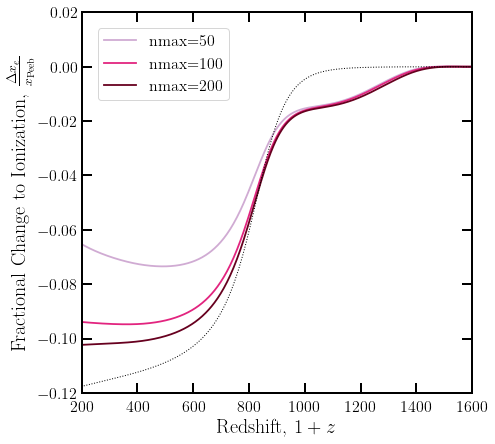

In [18]:
plt.figure(figsize=(7,7))
plt.axis([200,1600, -.12,.02])
ax = plt.gca()

color = iter(plt.cm.PuRd(np.linspace(0.3, 1, len(nmax_list))))


for i,nmax in enumerate(nmax_list):
    c = next(color)
    ax.plot(rs_list, nmax_convergence_alt[nmax][:,1]/baseline[:,1]-1, 
            linewidth = 1.8, label=r'nmax='+str(nmax), c=c)


ax.plot(rs_list, fudge[:,1] / baseline[:,1] - 1, linewidth=1, linestyle=':', c='k')

   
# ax.plot(rs_list, nmax_convergence_alt[50][:,1]/baseline[:,1]-1, 
#          linewidth = 1.8, label=r'$2s\to 1s$ BB')
# ax.plot(rs_list, tmp/baseline[:,1]-1, 
#              linewidth = 1.8, label=r'$2s\to 1s$ vacuum')

# hyrec plots
lw = 1.2
# ax.plot(EMLA_data[:,0], EMLA_data[:,1], color='black', 
#          linewidth = 2.0, linestyle = '--', 
#          label=r'Hyrec')


# plot labels
ax.set_xlabel(r'Redshift, $1+z$', fontsize=20)
ax.set_ylabel(r'Fractional Change to Ionization, $\frac{\Delta x_e}{x_{\mathrm{Peeb}}}$', fontsize=20)
ax.legend()